# U.S. Medical Insurance Costs

I will be examining the medical insurance cost dataset. My main goal is to see how each variable affects the cost of the insurance and how heavily they play a role in the adjustments.

In [25]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

In [6]:
insData = pd.read_csv('insurance.csv')
print(insData)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


Now that I have imported my insurance data, I want to run analyses on the data set. The first thing I want to see is the ratio of male vs female customers.

In [7]:
male = 0
female = 0
for x in range(len(insData)):
    if insData['sex'][x] == 'female':
        female += 1
    else:
        male += 1
print('There are {maleCount} male customers and {femaleCount} female customers in this dataset'.format(maleCount=male,femaleCount=female))

There are 676 male customers and 662 female customers in this dataset


There are roughly the same number of male and female respondents. I want to find the average insurance cost for each sex to determine if it is statistically significant.

In [8]:
maleCost = 0
femaleCost = 0
for x in range(len(insData)):
    if insData['sex'][x] == 'female':
        femaleCost += insData['charges'][x]
    else:
        maleCost += insData['charges'][x]
avgMaleCost = maleCost/male
avgFemaleCost = femaleCost/female
print('Men on average pay ${mCount} while women on average pay ${fCount}.'.format(mCount=avgMaleCost,fCount=avgFemaleCost))

Men on average pay $13956.751177721886 while women on average pay $12569.57884383534.


In [15]:
maleIns = insData['charges'][insData['sex'] == 'male']
femaleIns = insData['charges'][insData['sex'] == 'female']
stat1, pval1 = stats.ttest_ind(maleIns, femaleIns)
print(pval1)
print('significant' if pval1 < 0.05 else 'insignficiant')

0.03613272100592976
significant


By splitting insurance costs between male and female customers and running a t-test on the data, I found that there is a statistically significant difference between the two genders. I'd like to continue analyzing the dataset by figuring out how geographical regions affect the insurance cost.

In [16]:
uniqueRegions = insData['region'].unique()
print(uniqueRegions)

['southwest' 'southeast' 'northwest' 'northeast']


In [18]:
southwestIns = insData['charges'][insData['region'] == 'southwest']
southeastIns = insData['charges'][insData['region'] == 'southeast']
northwestIns = insData['charges'][insData['region'] == 'northwest']
northeastIns = insData['charges'][insData['region'] == 'northeast']

southwestInsAvg = np.mean(southwestIns)
southeastInsAvg = np.mean(southeastIns)
northwestInsAvg = np.mean(northwestIns)
northeastInsAvg = np.mean(northeastIns)
print('The southwest average is: ' + str(southwestInsAvg) + ', the southeast average is: ' + str(southeastInsAvg) + ', the northwest average is: ' + str(northwestInsAvg) + ', and the northeast average is: ' + str(northeastInsAvg))

The southwest average is:12346.93737729231, the southeast average is: 14735.411437609895, the northwest average is: 12417.575373969228, and the northeast average is: 13406.3845163858


From a cursory look, it seems like customers in the southeast pay more on average than customers in the other regions. To further assess this data, I can run a hypothesis test to determine statistical signficance. I will use an ANOVA to reduce false positives.

In [19]:
fval1, pval2 = stats.f_oneway(southwestIns, southeastIns, northwestIns, northeastIns)
print(pval2)

0.0308933560705201


Since the p-value is lower than my threshhold of 0.05, I will run a Tukey's range test to determine which of the regions is significant.

In [21]:
tukey_results = pairwise_tukeyhsd(insData['charges'], insData['region'], 0.05)
print(tukey_results)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8091 0.7002 -3428.9473  1451.329  False
northeast southeast  1329.0269 0.4754 -1044.9543 3703.0081  False
northeast southwest -1059.4471 0.6584 -3499.5853  1380.691  False
northwest southeast  2317.8361 0.0583    -54.212 4689.8842  False
northwest southwest    -70.638    0.9 -2508.8955 2367.6195  False
southeast southwest -2388.4741 0.0477 -4760.5221   -16.426   True
-----------------------------------------------------------------


The analysis shows that there is a statistically significant difference in costs between the customers in the southeast and southwest regions, but nowhere else. I will further illustrate this with a visual. 

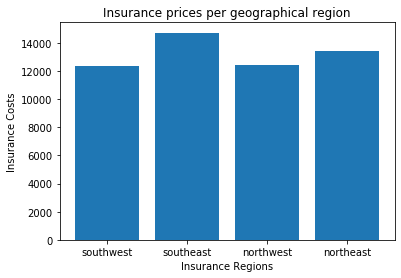

In [34]:
ax = plt.subplot(1,1,1)
regionIns = [southwestInsAvg, southeastInsAvg, northwestInsAvg, northeastInsAvg]
plt.bar(range(len(regionIns)), regionIns)
ax.set_xticks([0,1,2,3])
ax.set_xticklabels(['southwest', 'southeast', 'northwest', 'northeast'])
plt.xlabel('Insurance Regions')
plt.ylabel('Insurance Costs')
plt.title('Insurance prices per geographical region')
plt.show()

Visually, we can also see that the southwest and southeast regions have the largest difference in average cost. 